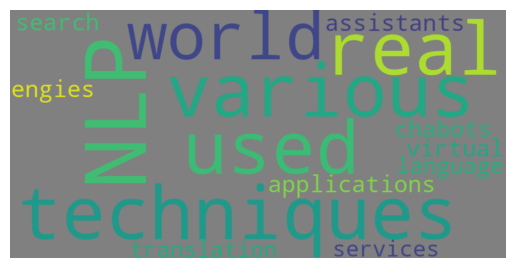

## Table of Contents

1. [Data Cleaning](#data-cleaning)
2. [Tokenization](#tokenization)
3. [Stopwords Removal](#stopwords-removal)
4. [Stemming and Lemmatization](#stemming-and-lemmatization)
5. [POS Tagging](#pos-tagging)
6. [Named Entity Recognition (NER)](#named-entity-recognition-ner)
7. [WordNet](#wordnet)
8. [Corpus Methods](#corpus-methods)
9. [Frequency Distribution](#frequency-distribution)
10. [Collocations](#collocations)
11. [RegexpParser](#regexpparser)
12. [TextBlob](#textblob)
13. [WordCloud](#wordcloud)

## Tasks

### 1. Data Cleaning <a name="data-cleaning"></a>
- Convert text to lowercase.
- Remove punctuation using the `string` library or regular expressions (`re`).

### 2. Tokenization <a name="tokenization"></a>
- Sentence tokenize using NLTK.
- Word tokenize using NLTK.

### 3. Stopwords Removal <a name="stopwords-removal"></a>
- Use NLTK's stopwords corpus to remove stopwords.

### 4. Stemming and Lemmatization <a name="stemming-and-lemmatization"></a>
- Use NLTK's `PorterStemmer`, `LancasterStemmer`, and `WordNetLemmatizer`.
- Use spaCy's lemmatization.

### 5. POS Tagging <a name="pos-tagging"></a>
- Perform Part of Speech (POS) tagging using NLTK or spaCy.

### 6. Named Entity Recognition (NER) <a name="named-entity-recognition-ner"></a>
- Utilize NER using NLTK's `ne_chunk` function or spaCy.

### 7. WordNet <a name="wordnet"></a>
- Access WordNet's synsets, definitions, and lemma names.

### 8. Corpus Methods <a name="corpus-methods"></a>
- Explore corpus methods available in NLTK.

### 9. Frequency Distribution <a name="frequency-distribution"></a>
- Use NLTK's `FreqDist` function and plot the distribution.

### 10. Collocations <a name="collocations"></a>
- Identify collocations in text using NLTK.

### 11. RegexpParser <a name="regexpparser"></a>
- Utilize NLTK's `RegexpParser` for parsing based on regular expressions.

### 12. TextBlob <a name="textblob"></a>
- Analyze text using TextBlob.

### 13. WordCloud <a name="wordcloud"></a>
- Generate word clouds from text.


# DATA CLEANING

# python huriestic Methods to clean the text

In [88]:
import pandas as pd


In [89]:
text =["The quick brown fox jumps over the lazy dog. However","," "the dog didn't seem to care much. ","It just continued to laze around. Meanwhile," ,"the fox looked for other adventures."]

In [90]:
df= pd.DataFrame({'text':text})

Lower Case

# LOWER

In [91]:
df["lower"] = df["text"].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [92]:
df["lower"]

0    the quick brown fox jumps over the lazy dog. h...
1                   ,the dog didn't seem to care much.
2         it just continued to laze around. meanwhile,
3                 the fox looked for other adventures.
Name: lower, dtype: object

In [93]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# PUNCTUATION

In [94]:
df["punctuation"] = df["text"].apply(lambda x:"".join(i for i in x if i not in string.punctuation))

In [95]:
df["punctuation"]

0    The quick brown fox jumps over the lazy dog Ho...
1                     the dog didnt seem to care much 
2           It just continued to laze around Meanwhile
3                  the fox looked for other adventures
Name: punctuation, dtype: object

# REGULAR EXPRESSIONS

In [96]:
import re

raw_text = """
<blockquote>Hi there! Welcome to my website, www.example.com. My email address is user@example.com.
Feel free to contact me at any time. You can also reach me on Twitter @username. I love coding and learning new things.
Don"""

# Remove HTML tags
cleaned_text = re.sub(r'<[^>]*>', '', raw_text)

# Replace newlines and tabs with spaces
cleaned_text = re.sub(r'[\n\t]', ' ', cleaned_text)

# Remove URLs
cleaned_text = re.sub(r'https?://\S+|www\.\S+@\S+|www.\S+', '', cleaned_text)

# Remove email addresses
cleaned_text = re.sub(r'@\S+', '', cleaned_text)

cleaned_text = re.sub(r'~[a-zA-Z+" "]','', cleaned_text)

print(cleaned_text)


 Hi there! Welcome to my website,  My email address is user Feel free to contact me at any time. You can also reach me on Twitter  I love coding and learning new things. Don


In [97]:
import re
df["re"] = df["text"].apply(lambda x: "".join(re.findall(r'[a-zA-Z+" "]', x)))

In [98]:
df["re"]

0    The quick brown fox jumps over the lazy dog Ho...
1                     the dog didnt seem to care much 
2           It just continued to laze around Meanwhile
3                  the fox looked for other adventures
Name: re, dtype: object

In [99]:
df=df.drop(columns=(df.columns))

In [100]:
raw_text = """
<blockquote>Hi there! Welcome to my website, www.example.com. My email address is user@example.com.

"""

# nltk

#Sentense Tokenize

In [101]:
from nltk.tokenize import sent_tokenize

In [102]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [103]:
sent_token=sent_tokenize(raw_text)

In [104]:
sent_token

['\n<blockquote>Hi there!',
 'Welcome to my website, www.example.com.',
 'My email address is user@example.com.']

# WORD TOKENIZE

In [105]:
from nltk.tokenize import word_tokenize , sent_tokenize
sent_token=sent_tokenize(raw_text)
word_token = [word_tokenize(sentence) for sentence in sent_token]
word_token_flat= [word for sublist in word_token for word in sublist]
print(f"words {word_token}, \nlenght of Sentence {len(word_token)}")
print(f"words {word_token_flat}, \nlenght of words {len(word_token_flat)}")



words [['<', 'blockquote', '>', 'Hi', 'there', '!'], ['Welcome', 'to', 'my', 'website', ',', 'www.example.com', '.'], ['My', 'email', 'address', 'is', 'user', '@', 'example.com', '.']], 
lenght of Sentence 3
words ['<', 'blockquote', '>', 'Hi', 'there', '!', 'Welcome', 'to', 'my', 'website', ',', 'www.example.com', '.', 'My', 'email', 'address', 'is', 'user', '@', 'example.com', '.'], 
lenght of words 21


In [106]:
df['sent_token'] = pd.DataFrame({"sent_token" : sent_token})

In [107]:
words= cleaned_text.split()
puct_text=[x for x in words if x not in string.punctuation]

In [108]:
print(puct_text)

['Hi', 'there!', 'Welcome', 'to', 'my', 'website,', 'My', 'email', 'address', 'is', 'user', 'Feel', 'free', 'to', 'contact', 'me', 'at', 'any', 'time.', 'You', 'can', 'also', 'reach', 'me', 'on', 'Twitter', 'I', 'love', 'coding', 'and', 'learning', 'new', 'things.', 'Don']


### stop words removal

- words which are comming frequently in the corpus those are not holding any meaning and also it will increase the parsecity

In [109]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
from nltk.corpus import stopwords

In [111]:
all_stopwords= stopwords.words('english')

In [112]:
print(f"{all_stopwords}\n{len(all_stopwords)}")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [113]:
print(f"{words}\n{len(words)}")

['Hi', 'there!', 'Welcome', 'to', 'my', 'website,', 'My', 'email', 'address', 'is', 'user', 'Feel', 'free', 'to', 'contact', 'me', 'at', 'any', 'time.', 'You', 'can', 'also', 'reach', 'me', 'on', 'Twitter', 'I', 'love', 'coding', 'and', 'learning', 'new', 'things.', 'Don']
34


In [114]:
Removed_stopwords=[x for x in words if x not in all_stopwords]

In [115]:
print(f"{Removed_stopwords}\n{len(Removed_stopwords)}")

['Hi', 'there!', 'Welcome', 'website,', 'My', 'email', 'address', 'user', 'Feel', 'free', 'contact', 'time.', 'You', 'also', 'reach', 'Twitter', 'I', 'love', 'coding', 'learning', 'new', 'things.', 'Don']
23


---
# 3. **Stemming and Lemmatization**: Reducing words to their base or root form.
   - `PorterStemmer`: Implements the Porter stemming algorithm.
   - `LancasterStemmer`: Implements the Lancaster stemming algorithm.
   - `WordNetLemmatizer`: Lemmatizes words using WordNet's lexical database.

---

# Stemming:
Stemming is the process of removing suffixes from words to reduce them to their root or base form. The resulting stem may not always be a valid word, but it often represents the core meaning of the word. Stemming algorithms work by applying heuristic rules to chop off suffixes.

# Porter Stemmer:

In [116]:
sentence= "She was impressed by his written skills; his essays were always eloquent and well-structured."

In [117]:
words_lower=[word.lower() for word in sentence.split()]



In [118]:
print(words_lower)



['she', 'was', 'impressed', 'by', 'his', 'written', 'skills;', 'his', 'essays', 'were', 'always', 'eloquent', 'and', 'well-structured.']


In [119]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stem_words=list()
for word in words_lower:
  stem= stemmer.stem(word)
  stem_words.append(stem)
for i, j in zip(stem_words, words_lower):
  if (i!=j):
    print(f"stem_words\t{i}\tReal Words\t{j}")



stem_words	wa	Real Words	was
stem_words	impress	Real Words	impressed
stem_words	hi	Real Words	his
stem_words	hi	Real Words	his
stem_words	essay	Real Words	essays
stem_words	alway	Real Words	always
stem_words	eloqu	Real Words	eloquent


# Snowball Stemmer (Porter2)

- This is an improved version of the Porter Stemmer, offering better language and accuracy

In [120]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
snow_words=[]
for word in words_lower:
  stem = stemmer.stem(word)
  snow_words.append(stem)
for i , j in zip(words_lower, snow_words):

    print(f"Real Word\t{i}\tSnow_stem_word\t{j}")


Real Word	she	Snow_stem_word	she
Real Word	was	Snow_stem_word	was
Real Word	impressed	Snow_stem_word	impress
Real Word	by	Snow_stem_word	by
Real Word	his	Snow_stem_word	his
Real Word	written	Snow_stem_word	written
Real Word	skills;	Snow_stem_word	skills;
Real Word	his	Snow_stem_word	his
Real Word	essays	Snow_stem_word	essay
Real Word	were	Snow_stem_word	were
Real Word	always	Snow_stem_word	alway
Real Word	eloquent	Snow_stem_word	eloqu
Real Word	and	Snow_stem_word	and
Real Word	well-structured.	Snow_stem_word	well-structured.


# Lemmatization

- Lemmatization is the process of reducing words to their base or dictonary form, which is called the lemma. Unlike stemming. lemmatization ensures that the resulting lemma is a valid word. it uses lexical knowledge and context to accuratly reduce words

# WordNet Lemmatizer

In [121]:
print(words_lower)

['she', 'was', 'impressed', 'by', 'his', 'written', 'skills;', 'his', 'essays', 'were', 'always', 'eloquent', 'and', 'well-structured.']


In [122]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [123]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()
lemma_word=[]
for word in words_lower:
  lemma = lemmatizer.lemmatize(word, pos='v')
  lemma_word.append(lemma)

for i , j in zip(words_lower, lemma_word):
  if i!=j:
    print(f"real {i}\t--->\t{j}")

real was	--->	be
real impressed	--->	impress
real written	--->	write
real essays	--->	essay
real were	--->	be


#Spacy Lemmatizer
  Spacy is another populor NLP library that provides lemmatization fucntionality



In [124]:
import spacy
nlp = spacy.load('en_core_web_sm')
spacy_words=[]
for word in words_lower:
  doc = nlp(word)
  spacy_words.extend([token.lemma_ for token in doc])
for i , j in zip(words_lower, spacy_words):
  if i!=j:
    print(f"real {i}\t--->\t{j}")

real was	--->	be
real written	--->	write
real skills;	--->	skill
real his	--->	;
real essays	--->	his
real were	--->	essay
real always	--->	be
real eloquent	--->	always
real and	--->	eloquent
real well-structured.	--->	and


# Differances :

- **Stemming** typically involves chopping off prefixes or suffixes of words based on heuristic rules. while **Lemmatization** uses vocabulary and morphological analysis to return the base or dictonary for of word
- **Stemming** can result in non real words while **Lemmatization**  always return the valid dictonary words

- **Stemming** is generally faster and less computationally intensive than  **Lemmatization**




### Part-of-Speech (POS) Tagging

Part-of-Speech (POS) tagging is the process of assigning a grammatical category to each word in a text. These categories typically include nouns, verbs, adjectives, adverbs, pronouns, prepositions, conjunctions, and interjections. POS tagging is a fundamental task in natural language processing (NLP) and is used in various downstream applications such as text analysis, machine translation, and information retrieval.

### pos_tag() Function

The `pos_tag()` function, provided by NLTK (Natural Language Toolkit), performs POS tagging on a list of words. It uses pre-trained models and algorithms to assign the most likely POS tags to each word based on its context in the sentence.

#### How `pos_tag()` works:

1. **Tokenization:** The input text is first tokenized into individual words or tokens.

2. **Tagging:** Each token is then assigned a POS tag based on its context in the sentence and its linguistic properties. This is typically done using statistical models, rule-based systems, or a combination of both.

3. **Output:** The function returns a list of tuples, where each tuple contains a word and its corresponding POS tag.


In [125]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [126]:
txt= "The Quick brown fox jumps over the lazy dog."
tag_list=list
words=word_tokenize(txt)
tagged_words=pos_tag(words)
# for word in words:
#   tagged_words=pos_tag(word)
#   tag_list.append(tagged_words)
print(tagged_words)

[('The', 'DT'), ('Quick', 'NNP'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]



### Named Entity Recognition (NER)

Named Entity Recognition (NER) is the process of identifying and categorizing named entities such as names of people, organizations, locations, dates, and numerical expressions in text. NER is a crucial task in natural language processing (NLP) and is used in various applications including information extraction, question answering, and document summarization.

### `ne_chunk()` Function

The `ne_chunk()` function, provided by NLTK (Natural Language Toolkit), performs Named Entity Recognition (NER) on a list of tagged words. It takes part-of-speech (POS) tagged words as input and identifies named entities in the text.

#### How `ne_chunk()` works:

1. **Tokenization and POS Tagging:** The input text is tokenized into individual words or tokens, and each word is assigned a POS tag indicating its grammatical category.

2. **NER:** The function then identifies and categorizes named entities in the text based on patterns and rules learned from training data. It typically uses machine learning algorithms or rule-based systems to recognize named entities.

3. **Output:** The function returns a nested tree structure called a chunk tree, where named entities are grouped together under specific types such as PERSON, ORGANIZATION, and LOCATION.


In [127]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Sample text
text = "Barack Obama was born in Hawaii and served as the 44th President of the United States."

# Tokenize the text into words
words = word_tokenize(text)

# Perform POS tagging
tagged_words = pos_tag(words)

# Perform Named Entity Recognition (NER)
ner_tree = ne_chunk(tagged_words)

print(ner_tree)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  (PERSON Barack/NNP)
  (PERSON Obama/NNP)
  was/VBD
  born/VBN
  in/IN
  (GPE Hawaii/NNP)
  and/CC
  served/VBD
  as/IN
  the/DT
  44th/CD
  President/NNP
  of/IN
  the/DT
  (GPE United/NNP States/NNPS)
  ./.)


### WordNet

WordNet is a lexical database of English language words, which is commonly used in natural language processing (NLP) tasks. It provides a rich source of information about words, including their meanings, synonyms, antonyms, and semantic relationships.

#### Features of WordNet:

1. **Synsets:** WordNet groups English words into sets of synonyms called synsets. Each synset represents a distinct concept and contains one or more words that are synonymous within that concept.

2. **Definitions:** WordNet provides short definitions for each synset, helping to clarify the meaning of words and concepts.

3. **Semantic Relationships:** WordNet records various semantic relationships between synsets, such as hypernyms (more general terms), hyponyms (more specific terms), meronyms (part-whole relationships), and holonyms (whole-part relationships).

#### How to use WordNet in NLTK:

To use WordNet in NLTK, you can instantiate a `WordNetCorpusReader` object, which provides access to the WordNet corpus and its functionalities.


In [128]:
from nltk.corpus import wordnet

# Now you can use methods provided by WordNet, such as synsets(), synset(), lemma_names(), etc.

dog_synsets =wordnet.synsets('dog')
print(dog_synsets,"\n")

if dog_synsets:
  print(dog_synsets[0].definition(),"\n")

if dog_synsets:
  print(dog_synsets[0].lemma_names(),"\n")

[Synset('dog.n.01'), Synset('frump.n.01'), Synset('dog.n.03'), Synset('cad.n.01'), Synset('frank.n.02'), Synset('pawl.n.01'), Synset('andiron.n.01'), Synset('chase.v.01')] 

a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds 

['dog', 'domestic_dog', 'Canis_familiaris'] 



## EXPLAINATION:

1. **Synset('dog.n.01')**: Represents a domesticated mammal, typically kept as a pet or trained for specific purposes.

2. **Synset('frump.n.01')**: Informal term for a woman who is dowdy, unattractive, or unfashionable.

3. **Synset('dog.n.03')**: Mechanical device resembling a dog, often used as a fastener or holder.

4. **Synset('cad.n.01')**: A man who behaves dishonorably or deceitfully, especially towards women.

5. **Synset('frank.n.02')**: Smooth-textured sausage made of minced meat, especially pork, usually flavored with garlic.

6. **Synset('pawl.n.01')**: Pivoted tongue or sliding bolt used to lock or regulate the movement of a wheel or shaft in machinery.

7. **Synset('andiron.n.01')**: Horizontal iron bar upon which logs are laid in an open fireplace.

8. **Synset('chase.v.01')**: Action of pursuing or hunting, or to follow closely in order to catch or overtake.


In [129]:
from nltk.corpus import wordnet

# Find synsets for the word "dog"
dog_synsets = wordnet.synsets('dog')

# Iterate over each synset and print its details
for synset in dog_synsets:
    print("Synset:", synset.name())
    print("Definition:", synset.definition())
    print("Examples:", synset.examples())
    print("Hypernyms:", synset.hypernyms())
    print("Hyponyms:", synset.hyponyms())
    print("-----")


Synset: dog.n.01
Definition: a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
Examples: ['the dog barked all night']
Hypernyms: [Synset('canine.n.02'), Synset('domestic_animal.n.01')]
Hyponyms: [Synset('basenji.n.01'), Synset('corgi.n.01'), Synset('cur.n.01'), Synset('dalmatian.n.02'), Synset('great_pyrenees.n.01'), Synset('griffon.n.02'), Synset('hunting_dog.n.01'), Synset('lapdog.n.01'), Synset('leonberg.n.01'), Synset('mexican_hairless.n.01'), Synset('newfoundland.n.01'), Synset('pooch.n.01'), Synset('poodle.n.01'), Synset('pug.n.01'), Synset('puppy.n.01'), Synset('spitz.n.01'), Synset('toy_dog.n.01'), Synset('working_dog.n.01')]
-----
Synset: frump.n.01
Definition: a dull unattractive unpleasant girl or woman
Examples: ['she got a reputation as a frump', "she's a real dog"]
Hypernyms: [Synset('unpleasant_woman.n.01')]
Hyponyms: []
-----
Synset: dog.n.03
Definition: informal term fo

### `corpus()` Method in NLTK

The `corpus()` method is a convenient way to access various text corpora included with the Natural Language Toolkit (NLTK) library. NLTK provides a wide range of text corpora that cover different languages, genres, and domains, making it a valuable resource for natural language processing (NLP) research and development.

#### Purpose:

The primary purpose of the `corpus()` method is to load and provide access to pre-processed text corpora, allowing users to analyze, manipulate, and experiment with text data for various NLP tasks.

#### Usage:

To use the `corpus()` method, you first import the `nltk.corpus` module and then call the method with the name of the desired corpus as an argument. This will return an instance of the specified corpus, which you can then use to access the text data and associated metadata.


In [130]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

# Load the Brown Corpus
brown_corpus = nltk.corpus.brown

# Print information about the corpus
print("Categories:", brown_corpus.categories())
print("Number of sentences:", len(brown_corpus.sents()))
print("Number of words:", len(brown_corpus.words()))


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


Categories: ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
Number of sentences: 57340
Number of words: 1161192


In [131]:
from nltk.corpus import wordnet

# Search for the word "car" in WordNet
search_word = "car"
synsets = wordnet.synsets(search_word)

# Print information about each synset
for synset in synsets:
    print("Synset:", synset.name())
    print("Definition:", synset.definition())
    print("Examples:", synset.examples())
    print("-"*50)


Synset: car.n.01
Definition: a motor vehicle with four wheels; usually propelled by an internal combustion engine
Examples: ['he needs a car to get to work']
--------------------------------------------------
Synset: car.n.02
Definition: a wheeled vehicle adapted to the rails of railroad
Examples: ['three cars had jumped the rails']
--------------------------------------------------
Synset: car.n.03
Definition: the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant
Examples: []
--------------------------------------------------
Synset: car.n.04
Definition: where passengers ride up and down
Examples: ['the car was on the top floor']
--------------------------------------------------
Synset: cable_car.n.01
Definition: a conveyance for passengers or freight on a cable railway
Examples: ['they took a cable car to the top of the mountain']
--------------------------------------------------



### `FreqDist()` Function in NLTK

The `FreqDist()` function is a part of the Natural Language Toolkit (NLTK) library and is used to compute the frequency distribution of tokens (words, characters, etc.) in a given text or list of tokens. It creates a frequency distribution object that allows you to easily count the occurrences of each token and analyze the distribution of token frequencies.

#### Purpose:

The primary purpose of the `FreqDist()` function is to provide a convenient way to calculate and analyze the frequency distribution of tokens in text data. It helps you understand the distribution of words or other units of text within a corpus, which is essential for various text analysis tasks.

#### Usage:

To use the `FreqDist()` function, you first import the `FreqDist` class from the `nltk.probability` module. Then, you create a `FreqDist` object by passing a list of tokens as input. You can then use methods provided by the `FreqDist` class to retrieve frequency counts and perform various analyses on the distribution.


Most common words: [('the', 3), ('quick', 2), ('brown', 2), ('fox', 2), ('jumps', 2)]
<FreqDist with 9 samples and 17 outcomes>


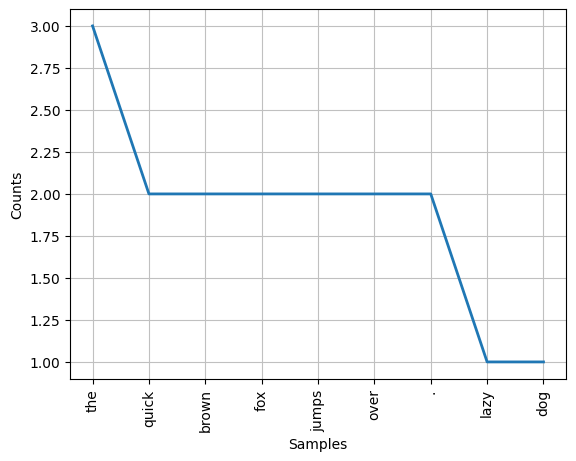

<Axes: xlabel='Samples', ylabel='Counts'>

In [132]:
import nltk
from nltk.probability import FreqDist

# Sample text
text = "the quick brown fox jumps over the lazy dog. the quick brown fox jumps over."


# Tokenize the text into words
words = nltk.word_tokenize(text)

# Create a frequency distribution of words
freq_dist = FreqDist(words)

# Print the most common words
print("Most common words:", freq_dist.most_common(5))
print(freq_dist)

# Plot the frequency distribution
freq_dist.plot(20)


### Collocations in Natural Language Processing (NLP)

Collocations are sequences of words that frequently occur together in a text and often have some specific meaning or significance. They are commonly used in natural language processing (NLP) tasks to identify and extract meaningful phrases or expressions from text data.

#### Characteristics of Collocations:

1. **Frequency:** Collocations occur together more frequently than would be expected by chance. This suggests that the words in a collocation are likely to be related or have a specific linguistic or semantic association.

2. **Fixedness:** Collocations often have a fixed or semi-fixed word order, meaning that the words within a collocation tend to appear in a particular sequence. This fixedness contributes to the collocation's stability and predictability.

3. **Semantic Content:** Collocations typically have some degree of semantic content or meaning beyond the individual words themselves. They may convey specific concepts, ideas, or associations that are not apparent when considering the words in isolation.

#### Importance of Collocations:

1. **Semantic Analysis:** Identifying collocations can help in understanding the semantic relationships between words and phrases in a text. They provide insights into how words are used together to convey meaning and express ideas.

2. **Information Extraction:** Collocations are often used to extract meaningful phrases or expressions from text data, which can be useful for various NLP tasks such as information retrieval, document summarization, and sentiment analysis.

3. **Language Modeling:** Incorporating collocations into language models can improve the accuracy and performance of NLP systems by capturing the contextual dependencies between words and enhancing the model's ability to generate coherent and meaningful text.

#### Example:

Consider the collocation "red wine." In this phrase, the words "red" and "wine" frequently occur together in texts discussing types of wine. The collocation "red wine" conveys the specific concept of wine made from red grapes, illustrating the semantic content and fixed word order characteristic of collocations.

Overall, collocations play a crucial role in NLP by providing insights into the structure and meaning of natural language text and facilitating various language processing tasks.


In [133]:
# import nltk
# nltk.download('gutenberg')
# nltk.download('genesis')
# nltk.download('inaugural')
# nltk.download('nps_chat')
# nltk.download('webtext')
# nltk.download('treebank')
# from nltk.book import text1


In [134]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Define the raw text
txt = "New-York to New-Delhi is 12000 km you can take flight and enjoy Old Monk i said to old man"

# Tokenize the text into words
words = nltk.word_tokenize(txt)

# Create an NLTK Text object
text = nltk.Text(words)


# Find and print collocations
collocations = text.collocations()

if not collocations:
    print("No collocations found.")



No collocations found.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [135]:
import nltk
from nltk.chunk import RegexpParser

# Define a regular expression pattern for noun phrases
grammar = r"""
  NP: {<DT>?<JJ>*<NN>}   # noun phrase
"""

# Create a RegexpParser object with the defined grammar
chunk_parser = RegexpParser(grammar)

# Tokenize the text
text = "The quick brown fox jumps over the lazy dog"
tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(tokens)

# Apply the parser to identify chunks
tree = chunk_parser.parse(pos_tags)

# Print the resulting parse tree
print(tree)


(S
  (NP The/DT quick/JJ brown/NN)
  (NP fox/NN)
  jumps/VBZ
  over/IN
  (NP the/DT lazy/JJ dog/NN))


In [136]:
import nltk
from nltk.chunk import RegexpParser

# Sample paragraph of text
paragraph = """
Natral languge processing (NLP) is a field of artficial intelligence that focuses on
the interaction between computers and humans through natural language. It encopasses a wide range of tasks,
including text analysis, machine translation, sentient analysis, named entity recogntion, and more.
NLP techniques are used in various real-world applications such as virtual assistants, chabots, search engies, and language translation services.
"""

# Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)

# Tokenize each sentence into words and tag parts of speech
tagged_sentences = [nltk.pos_tag(nltk.word_tokenize(sentence)) for sentence in sentences]
print(tagged_sentences)
print('_'*100)
# Define a regular expression pattern for noun phrases
grammar = r"""
  NP: {<DT>?<JJ>*<NN>}   # noun phrase
"""

# Create a RegexpParser object with the defined grammar
chunk_parser = RegexpParser(grammar)

# Apply the parser to identify chunks in each tagged sentence
parsed_sentences = [chunk_parser.parse(tagged_sentence) for tagged_sentence in tagged_sentences]

# Print the resulting parse trees for each sentence
for parsed_sentence in parsed_sentences:
    print(parsed_sentence)
    print('_'*100)


[[('Natral', 'NNP'), ('languge', 'NN'), ('processing', 'NN'), ('(', '('), ('NLP', 'NNP'), (')', ')'), ('is', 'VBZ'), ('a', 'DT'), ('field', 'NN'), ('of', 'IN'), ('artficial', 'JJ'), ('intelligence', 'NN'), ('that', 'WDT'), ('focuses', 'VBZ'), ('on', 'IN'), ('the', 'DT'), ('interaction', 'NN'), ('between', 'IN'), ('computers', 'NNS'), ('and', 'CC'), ('humans', 'NNS'), ('through', 'IN'), ('natural', 'JJ'), ('language', 'NN'), ('.', '.')], [('It', 'PRP'), ('encopasses', 'VBZ'), ('a', 'DT'), ('wide', 'JJ'), ('range', 'NN'), ('of', 'IN'), ('tasks', 'NNS'), (',', ','), ('including', 'VBG'), ('text', 'JJ'), ('analysis', 'NN'), (',', ','), ('machine', 'NN'), ('translation', 'NN'), (',', ','), ('sentient', 'JJ'), ('analysis', 'NN'), (',', ','), ('named', 'VBN'), ('entity', 'NN'), ('recogntion', 'NN'), (',', ','), ('and', 'CC'), ('more', 'JJR'), ('.', '.')], [('NLP', 'NNP'), ('techniques', 'NNS'), ('are', 'VBP'), ('used', 'VBN'), ('in', 'IN'), ('various', 'JJ'), ('real-world', 'JJ'), ('applicati

# spelling correction

In [137]:
from textblob import TextBlob
correct_txt=[]

# Sample paragraph of text
paragraph = """
Natral languge processing (NLP) is a field of artficial inteligence that focses on.
the interaction between computers and humans through natural language. It encopasses a wide range of tasks,
including text analysis, machine translation, sentient analysis, named entity recogntion, and more.
NLP techniques are used in various real-world applications such as virtual assistants, chabots, search engies, and language translation services.
"""
from nltk.tokenize import sent_tokenize
sentence=sent_tokenize(paragraph)
print('_'*100)

words=paragraph.split()
for word in words:
  txt =TextBlob(word).correct()
  correct_txt.append(str(txt))

for i , j in zip(words, correct_txt):
  if i!=j:
    print(f"{i} --- {j}")

correct_txt = " ".join(correct_txt)
print('_'*100)


____________________________________________________________________________________________________
Natral --- Natural
languge --- language
artficial --- artificial
inteligence --- intelligence
focses --- horses
encopasses --- encompassed
sentient --- sentiment
recogntion, --- recognition,
techniques --- technique
chabots, --- habits,
engies, --- engines,
____________________________________________________________________________________________________


# Wordcloud

NLP techniques are used in various real-world applications such as virtual assistants , chabots , search engies , and language translation services .


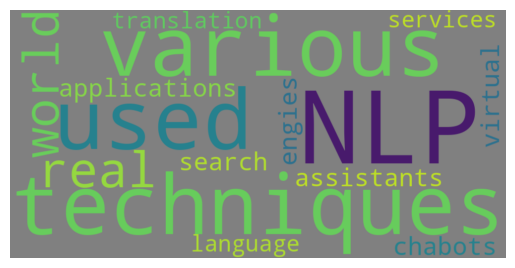

In [138]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# print(paragraph)

sentence=nltk.sent_tokenize(paragraph)
str_words=""
for word in sentence:
  if word not in STOPWORDS:
    w = nltk.word_tokenize(word)
    str_words=" ".join(w)

print(str_words)
wordcloud=WordCloud(width= 1000, height=500, background_color='grey').generate(str_words)
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

## Part 2 will come soon...